In [30]:
# import libraries
import numpy as np # For numerical calculations
import pandas as pd # for dataframe
import seaborn as sns # Visualizations
import matplotlib.pyplot as plt # visualization
import nltk # for nlp
from nltk.corpus import stopwords

In [31]:
# Load dataset
path = '../datasets/data_ted_talks.csv'
df = pd.read_csv(path)

In [32]:
print(df.head(3))

   talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   
2        7                 Simplicity sells   David Pogue   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2   {0: 'David Pogue'}                  {0: ['technology columnist']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  

In [33]:
print(df.tail(3))

      talk_id                                             title  \
4002    62263  How "policing for profit" undermines your rights   
4003    62784      The electrifying speeches of Sojourner Truth   
4004    62794              The most important anus in the ocean   

                 speaker_1                 all_speakers  \
4002  Dick M. Carpenter II  {0: 'Dick M. Carpenter II'}   
4003     Daina Ramey Berry     {0: 'Daina Ramey Berry'}   
4004          Cella Wright          {0: 'Cella Wright'}   

                  occupations  \
4002  {0: ['law researcher']}   
4003                      NaN   
4004                      NaN   

                                         about_speakers   views recorded_date  \
4002  {0: 'Dick M. Carpenter II studies cutting edge...  464414    2019-06-22   
4003                                                NaN   56582    2020-04-28   
4004                                                NaN       0    2020-04-30   

     published_date         event na

In [35]:
# print shape and columns
print(f" shape :{df.shape}")
print()
print(f" columns :{list(df.columns)}")

 shape :(4005, 19)

 columns :['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'views', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'comments', 'duration', 'topics', 'related_talks', 'url', 'description', 'transcript']


In [36]:
# describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [37]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [38]:
# missing/null values
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

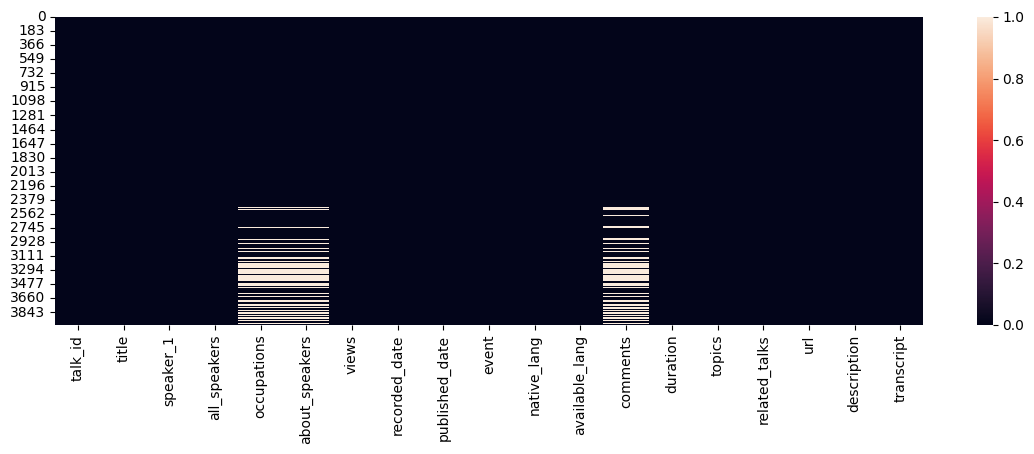

In [43]:
# null visualization
plt.rcParams['figure.figsize'] = (14,4)
sns.heatmap(df.isna())
plt.show()

#### Data Descriptions
1. Shape : (19, 4005)
2. Columns :
   * talk_id : unique id (null 0)
   * title : title of the event (null 0)
   * speaker_1 : name of the speaker (null 0)
   * all_speakers : name of all speakers (null 4)
   * occupations : occupation of the speakers (null 522)
   * about_speakers : bio of speaker (null 503)
   * view : number of views (null 0)
   * recorded_date : video recording date (null 1)
   * published_date : video published date (null 0)
   * event : event type (null 0)
   * native_lang : native language (null 0)
   * available_lang : available language (null 0)
   * comments : (null 655)
   * duration : duration of the video (null 0)
   * topics : topics (null 0)
   * related_talks : (null 0)
   * url : url (null 0)
   * description : descriptions (null 0)
   * transcript : transcript (null 0)

In [8]:
transcripts = df['transcript']

In [9]:
transcripts[1]

'About 10 years ago, I took on the task to teach global development to Swedish undergraduate students. That was after having spent about 20 years, together with African institutions, studying hunger in Africa. So I was sort of expected to know a little about the world. And I started, in our medical university, Karolinska Institute, an undergraduate course called Global Health. But when you get that opportunity, you get a little nervous. I thought, these students coming to us actually have the highest grade you can get in the Swedish college system, so I thought, maybe they know everything I\'m going to teach them about. So I did a pretest when they came. And one of the questions from which I learned a lot was this one: "Which country has the highest child mortality of these five pairs?" And I put them together so that in each pair of countries, one has twice the child mortality of the other. And this means that it\'s much bigger, the difference, than the uncertainty of the data. I won\